In [1]:
import pandas as pd
from fraud_detection.core.settings import settings
from fraud_detection.data.loader import DataHandler
from fraud_detection.data.cleaning import DataCleaning, normalize_ip_range,normalize_ip_address
from fraud_detection.viz.plots import Visualizer
from fraud_detection.features.feature_builder import FraudFeatureEngineer

- Data I/O

In [2]:
# Card data 
credit_df = DataHandler.from_registry("DATA", "raw_dir", "creditcard.csv").load()

# Fraud Data
fraud_df = DataHandler.from_registry(
    "DATA", "raw_dir", "Fraud_Data.csv").load()

# Ip address data
ip_df = DataHandler.from_registry(
    "DATA", "raw_dir", "IpAddress_to_Country.csv").load()

In [3]:
credit_df.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [4]:
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [5]:
ip_df.dtypes

lower_bound_ip_address    float64
upper_bound_ip_address      int64
country                    object
dtype: object

In [6]:
cleaner = DataCleaning(
    datetime_columns=["signup_time", "purchase_time"],
    numeric_columns=["purchase_value", "age"],
    verbose=True
)

fraud_df_clean = cleaner.clean(fraud_df)

Starting data cleaning...
Initial shape: (151112, 11)

Stripped whitespace from 6 string columns.
No empty strings found.
Converted 'signup_time' to datetime (NaN before: 0, after: 0).
Converted 'purchase_time' to datetime (NaN before: 0, after: 0).
Converted 'purchase_value' to numeric (NaN before: 0, after: 0).
Converted 'age' to numeric (NaN before: 0, after: 0).
No duplicate rows found.

Final shape after cleaning: (151112, 11)
Data cleaning completed.



In [7]:
fraud_df['class'] = fraud_df['class'].astype(int)
fraud_df['class'].dtypes

dtype('int64')

In [8]:
viz = Visualizer()

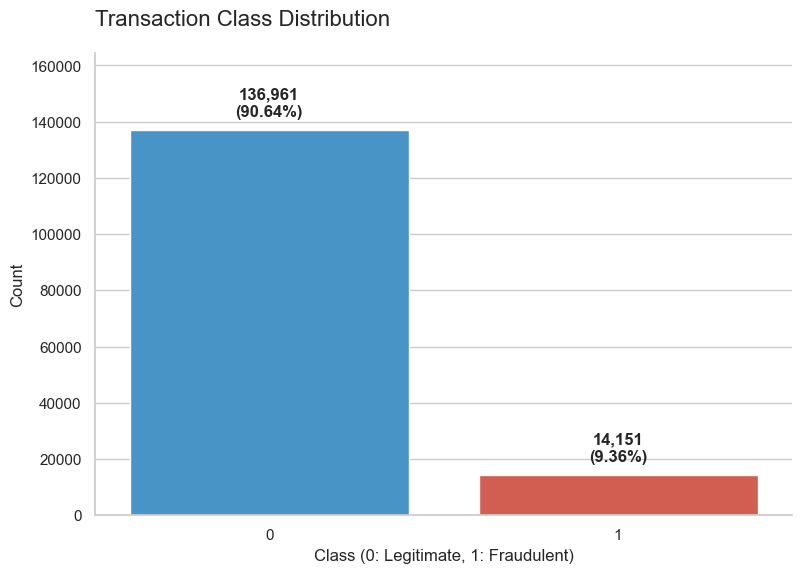

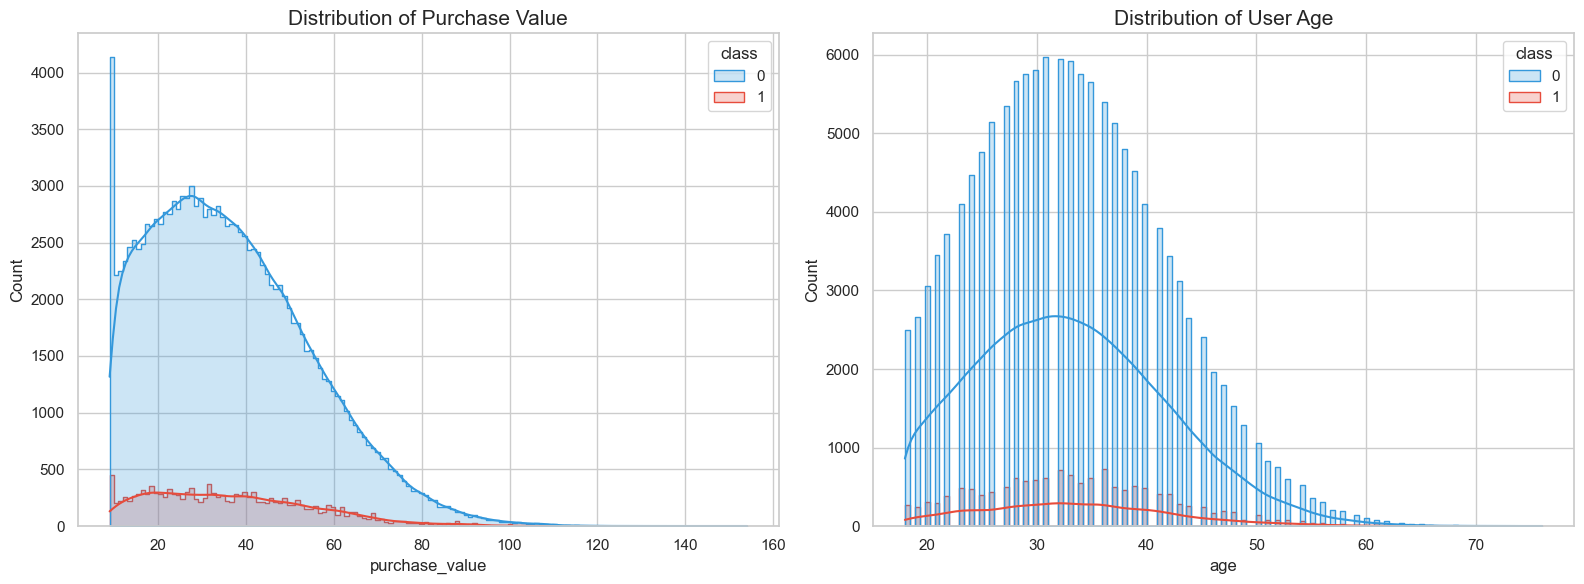

D:\10Acadamy\Week 5&6\Tasks\fraud-detection\src\fraud_detection\viz\plots.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='class', y='purchase_value',
D:\10Acadamy\Week 5&6\Tasks\fraud-detection\src\fraud_detection\viz\plots.py:65: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(data=df, x='class', y='purchase_value', estimator=np.mean,
D:\10Acadamy\Week 5&6\Tasks\fraud-detection\src\fraud_detection\viz\plots.py:65: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=df, x='class', y='purchase_value', estimator=np.mean,


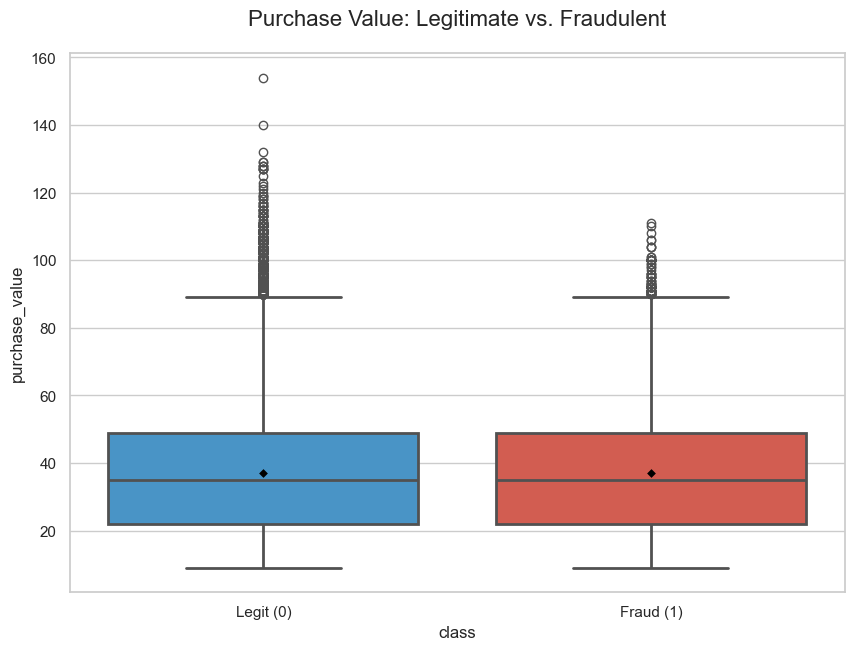

In [9]:
# 1. Check Class Imbalance
viz.analyze_class_distribution(fraud_df)

# 2. Compare Numerical Distributions (Age and Purchase Value)
viz.plot_fraud_distributions(fraud_df)

# 3. Deep dive into Purchase Value Outliers
viz.plot_purchase_value_boxplot(fraud_df)

In [10]:
ip_df = normalize_ip_range(ip_df)

ip_df.dtypes

No missing IP range values found.
No invalid IP range rows removed.
IP range columns converted to int64.


lower_bound_ip_address     int64
upper_bound_ip_address     int64
country                   object
dtype: object

IP range columns were normalized to integer format and invalid rows were removed to ensure accurate range-based geolocation mapping.

In [11]:
fraud_df = normalize_ip_address(fraud_df)

fraud_df.dtypes

IP column 'ip_address' numeric conversion (NaN before: 0, after: 0)
No invalid IP rows removed.
'ip_address' converted to int64.


user_id            int64
signup_time       object
purchase_time     object
purchase_value     int64
device_id         object
source            object
browser           object
sex               object
age                int64
ip_address         int64
class              int64
dtype: object

In [12]:
ip_df = ip_df.sort_values('lower_bound_ip_address')
fraud_df.dtypes
fraud_df = fraud_df.sort_values('ip_address')

fraud_df = pd.merge_asof(
    fraud_df,
    ip_df,
    left_on='ip_address',
    right_on='lower_bound_ip_address',
    direction='backward'
)

fraud_df = fraud_df[
    fraud_df['ip_address'] <= fraud_df['upper_bound_ip_address']
]

In [13]:
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,16778864,0,16778240.0,16779263.0,Australia
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,16842045,0,16809984.0,16842751.0,Thailand
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,16843656,0,16843264.0,16843775.0,China
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,16938732,0,16924672.0,16941055.0,China
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,16971984,0,16941056.0,16973823.0,Thailand


In [14]:
transaction_counts = fraud_df['country'].value_counts()
transaction_counts.head(20)

country
United States                      58049
China                              12038
Japan                               7306
United Kingdom                      4490
Korea Republic of                   4162
Germany                             3646
France                              3161
Canada                              2975
Brazil                              2961
Italy                               1944
Australia                           1844
Netherlands                         1680
Russian Federation                  1616
India                               1310
Taiwan; Republic of China (ROC)     1237
Mexico                              1121
Sweden                              1090
Spain                               1027
South Africa                         838
Switzerland                          785
Name: count, dtype: int64

D:\10Acadamy\Week 5&6\Tasks\fraud-detection\src\fraud_detection\viz\plots.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=counts, x='count',


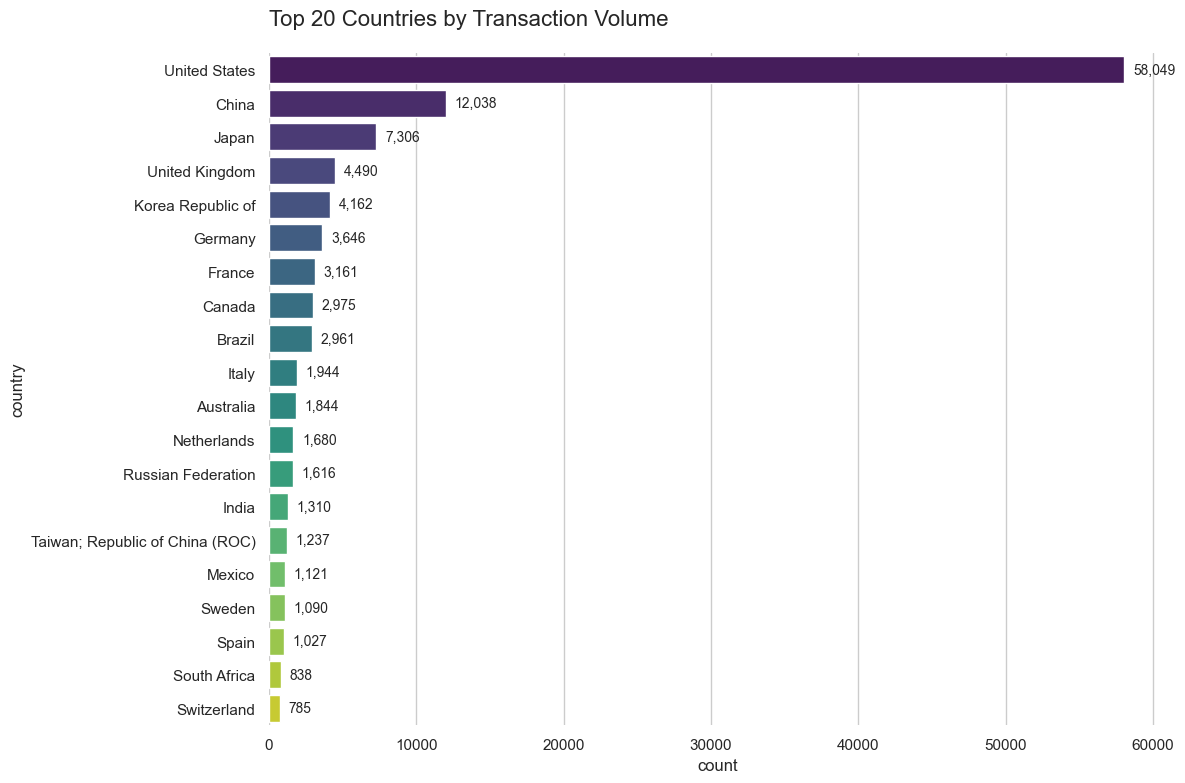

D:\10Acadamy\Week 5&6\Tasks\fraud-detection\src\fraud_detection\viz\plots.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=rates, x='mean', y='country', palette='Reds_r')


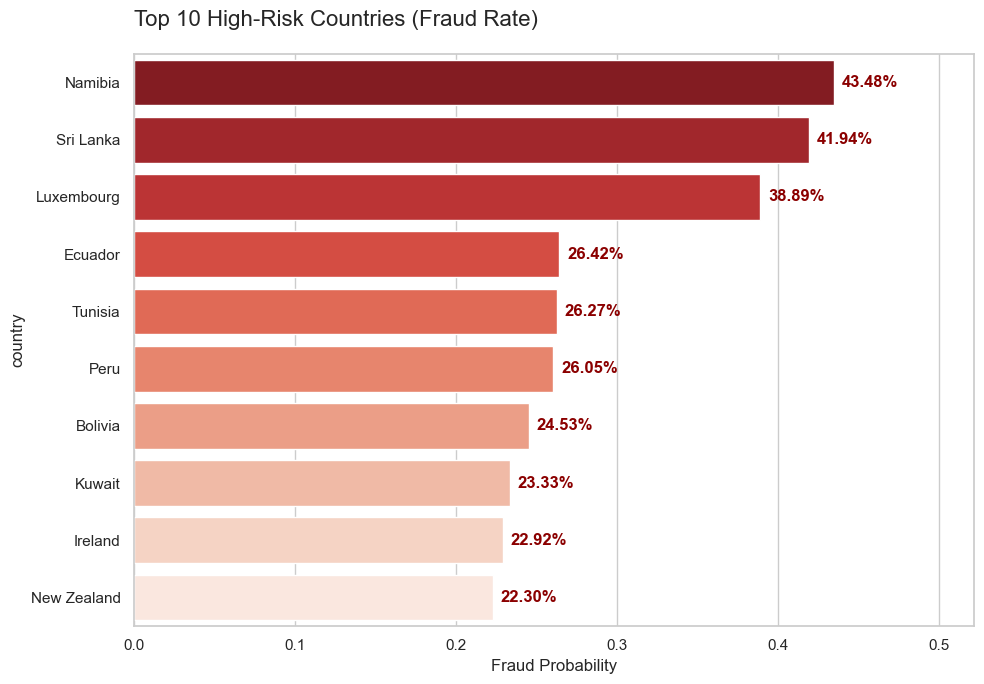

In [15]:
# 4. Geographic Analysis (Volume vs Risk)
viz.plot_top_countries(fraud_df)
viz.plot_fraud_rate_by_country(fraud_df)

In [16]:
engineer = FraudFeatureEngineer()

In [17]:
engineer = FraudFeatureEngineer()
df = engineer.extract_time_features(fraud_df)
df = engineer.extract_velocity_features(fraud_df)
df = engineer.handle_categorical_features(fraud_df)

# List of columns to scale for distance-based models (like Logistic Regression)
num_cols = ['purchase_value', 'age', 'time_since_signup', 'device_id_count', 'ip_address_count']
df = engineer.scale_numerical_data(fraud_df, num_cols)

df_final = engineer.prepare_final_df(fraud_df)

In [18]:
df_final

,purchase_value,source,browser,sex,age,class,country,time_since_signup,hour_of_day,day_of_week,device_id_count,ip_address_count
634,0.549607,2,4,0,-0.363124,0,7,-0.413800,3,6,-0.259874,-0.235061
635,-1.197335,2,0,0,0.101168,0,162,-1.180852,20,2,-0.259874,-0.235061
636,0.385831,0,2,1,-0.479197,0,36,-0.936126,23,5,0.116936,-0.235061
637,0.986342,1,0,0,-0.363124,0,36,0.867086,16,5,-0.259874,-0.235061
638,0.767974,2,0,0,0.449387,0,162,1.700633,4,1,-0.259874,-0.235061
...,...,...,...,...,...,...,...,...,...,...,...,...
131724,1.040934,1,3,0,-1.756001,0,36,-0.744347,22,1,-0.259874,-0.235061
131725,-0.050905,1,0,0,0.333314,0,36,-1.008669,22,3,-0.259874,-0.235061
131726,0.003687,2,1,1,1.029752,0,36,-0.514981,16,3,-0.259874,-0.235061
131727,-1.524887,1,0,0,0.449387,0,36,-1.447934,9,4,-0.259874,-0.235061


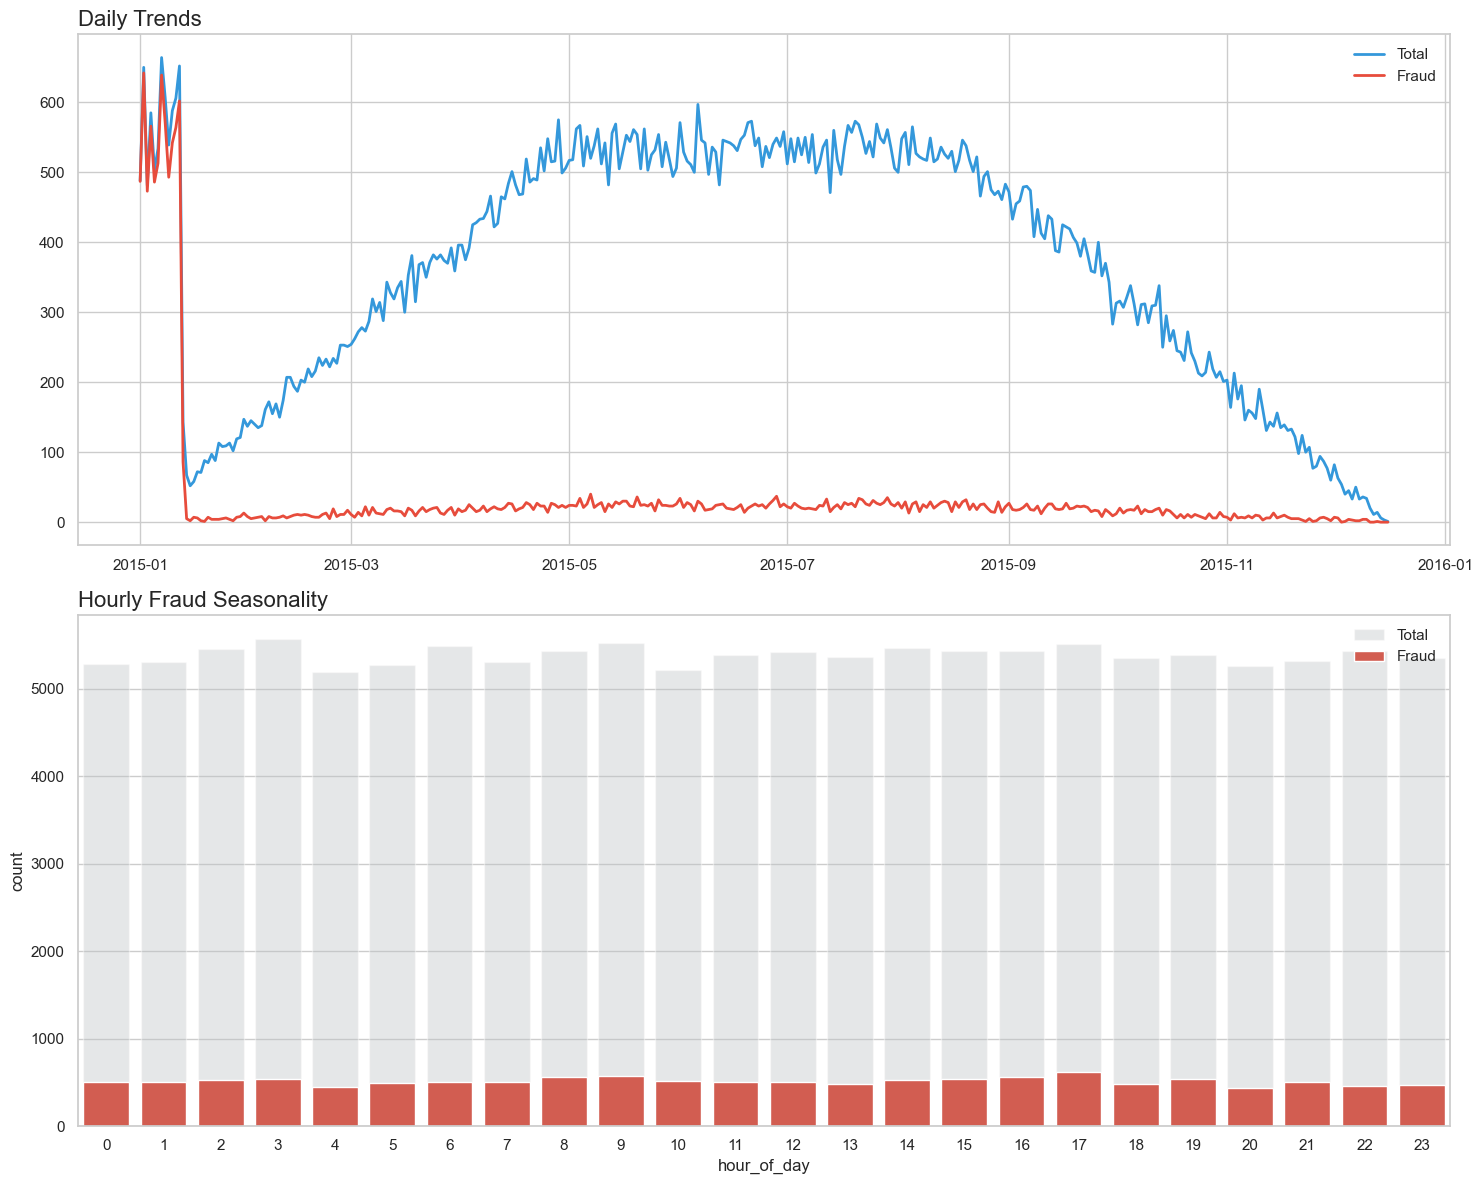

In [19]:
# 5. Temporal Analysis (When does fraud happen?)
viz.plot_time_series(fraud_df)